# 1. Convertir de RGB a escala de Grises

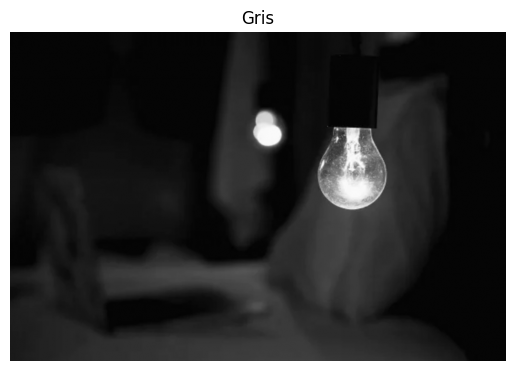

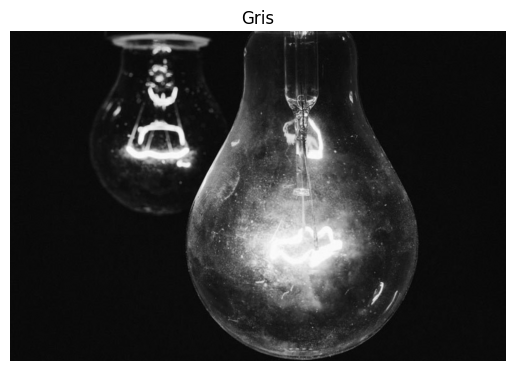

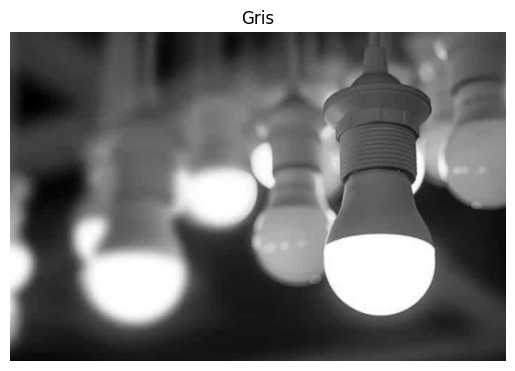

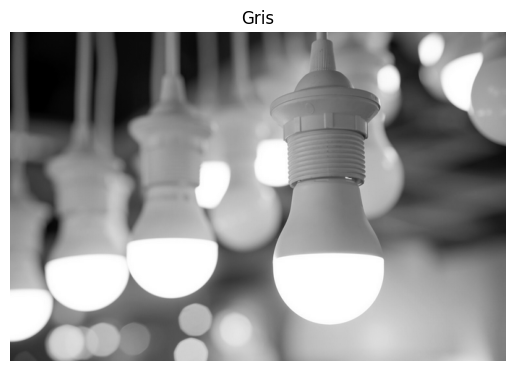

In [10]:
import cv2
import matplotlib.pyplot as plt

# Cargar las imagenes en color
imagenes = ['../image/1.png', '../image/2.png', '../image/3.png ', '../image/4.png']

for i in range(len(imagenes)):
    img = cv2.imread(imagenes[i])  # Leer en BGR
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir a RGB
    gray_img = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)  # Convertir a gris desde RGB

    # Mostrar la imagen en gris
    plt.imshow(gray_img, cmap='gray')
    plt.axis('off')
    plt.title('Gris')
    plt.show()
    # Guardar la imagen en escala de grises
    cv2.imwrite("../image/resultados/operaciones/gris/imagenes-gris" + str(i+1) + ".png", gray_img)



# 2. Convertir a Blanco y Negro (Binaria)

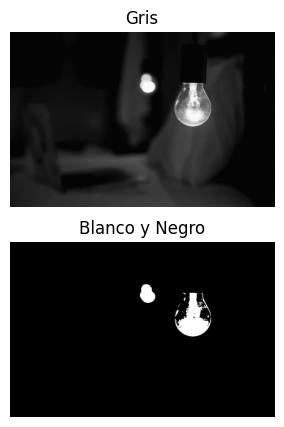

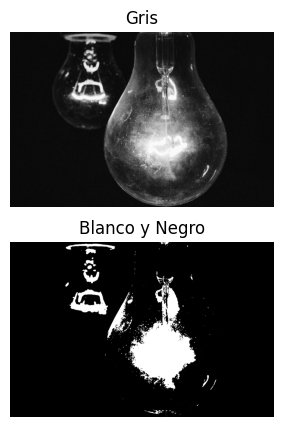

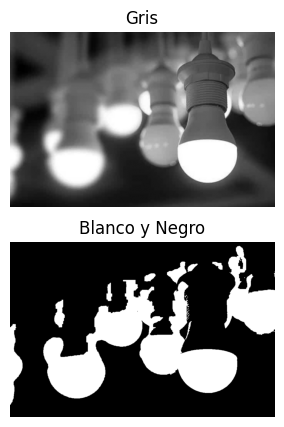

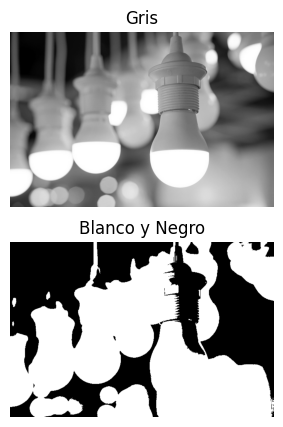

In [ ]:
import cv2

# Cargar las imagenes en escala de grises 
imagenes = [
    '../image/resultados/operaciones/gris/imagenes-gris1.png',
    '../image/resultados/operaciones/gris/imagenes-gris2.png',
    '../image/resultados/operaciones/gris/imagenes-gris3.png',
    '../image/resultados/operaciones/gris/imagenes-gris4.png'
]

for i in range(len(imagenes)):
    img = cv2.imread(imagenes[i], cv2.IMREAD_GRAYSCALE)  # Leer en escala de grises

    # Umbralizar la imagen para convertirla en blanco y negro (binaria)
    _, binary_img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)

    # Mostrar las imágenes utilizando matplotlib
    fig, axes = plt.subplots(2, 1, figsize=(15, 5))

    # Imagen original en gris
    axes[0].imshow(img, cmap='gray')
    axes[0].set_title("Gris")
    axes[0].axis('off')

    # Blanco y negro (binaria)
    axes[1].imshow(binary_img, cmap='gray')
    axes[1].set_title("Blanco y Negro")
    axes[1].axis('off')

    # Guardar la imagen en blanco y negro
    cv2.imwrite("../image/resultados/operaciones/binaria/imagenes-binaria" + str(i+1) + ".png", binary_img)


    plt.show()

# 3. Cambiar de Tamaño (Reducción o Amplificación)

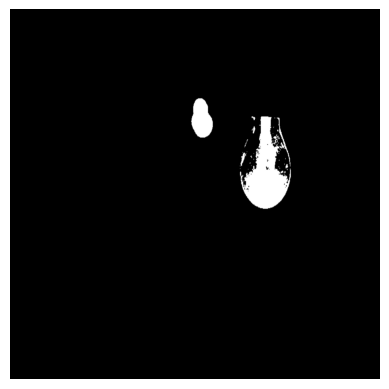

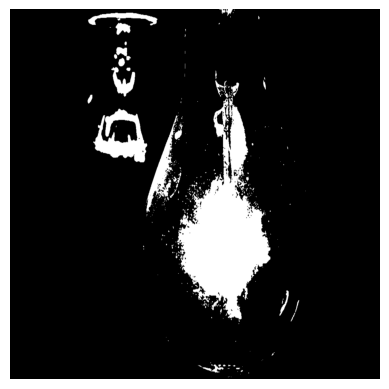

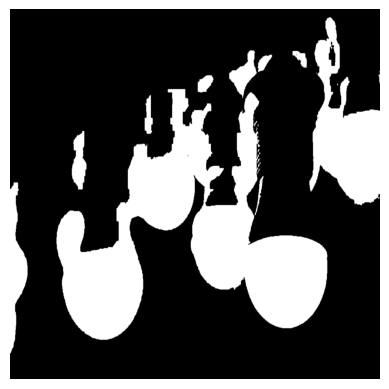

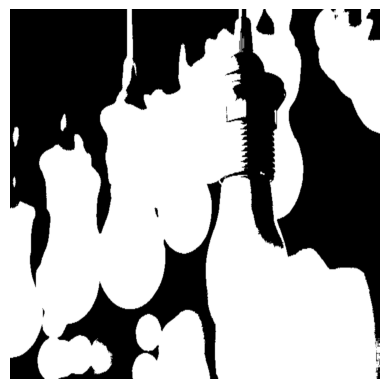

In [ ]:
import cv2



# Cargar las imagenes binarizadas
imagenes = [
    '../image/resultados/operaciones/binaria/imagenes-binaria1.png',
    '../image/resultados/operaciones/binaria/imagenes-binaria2.png',
    '../image/resultados/operaciones/binaria/imagenes-binaria3.png',
    '../image/resultados/operaciones/binaria/imagenes-binaria4.png'
]


for i in range(len(imagenes)):

  # Leer la imagen desde la ruta
    img = cv2.imread(imagenes[i], cv2.IMREAD_COLOR)
    # Cambiar el tamaño de la imagen (Reducción y Amplificación)
    resized_img = cv2.resize(img, (5000, 5000))  # Cambiar el tamaño a 5000x5000 píxeles

    # Mostrar la imagen redimensionada
    plt.imshow(resized_img)
    plt.axis('off')  # Ocultar los ejes
    plt.show()
    # Guardar la imagenes  redimensionadas
    cv2.imwrite("../image/resultados/operaciones/redimension/imagenes-redimensionada" + str(i+1) + ".png", resized_img)

# 4. Operaciones Geométricas: Rotación

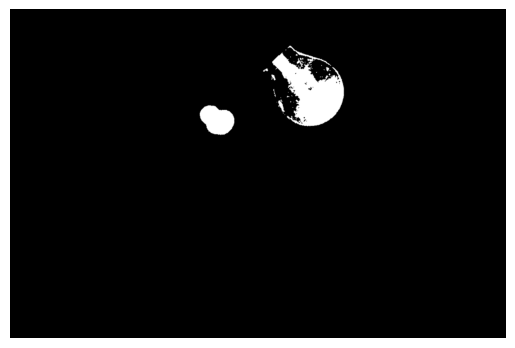

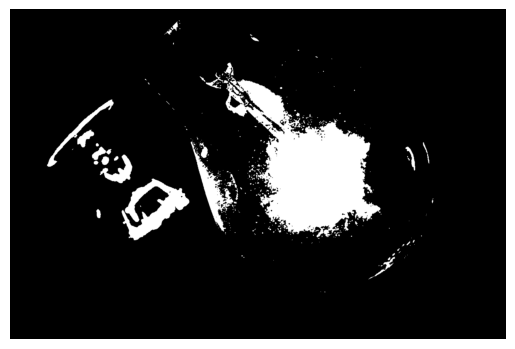

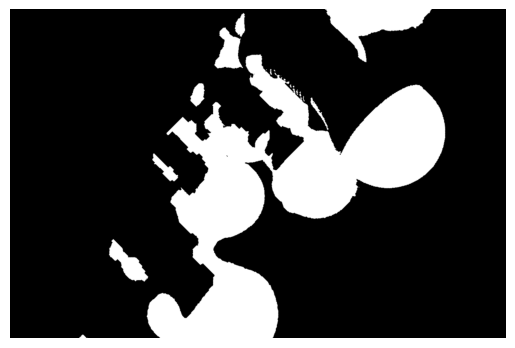

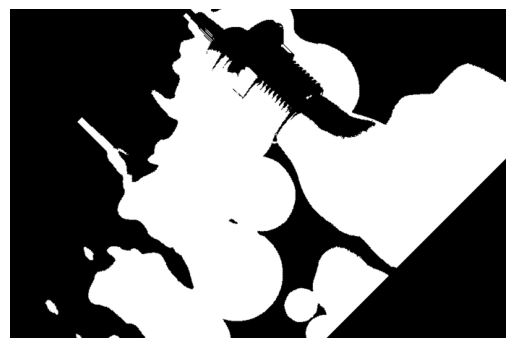

In [ ]:
import cv2


# Cargar las imagenes binarizadas
imagenes = [
    '../image/resultados/operaciones/binaria/imagenes-binaria1.png',
    '../image/resultados/operaciones/binaria/imagenes-binaria2.png',
    '../image/resultados/operaciones/binaria/imagenes-binaria3.png',
    '../image/resultados/operaciones/binaria/imagenes-binaria4.png'
]


for i in range(len(imagenes)):
    # Leer la imagen desde la ruta
    img = cv2.imread(imagenes[i], cv2.IMREAD_COLOR)


    # Obtener las dimensiones de la imagen
    (h, w) = img.shape[:2]

    # Establecer el centro de la imagen para rotarla
    center = (w // 2, h // 2)

    # Crear la matriz de rotación (por ejemplo, 45 grados)
    M = cv2.getRotationMatrix2D(center, 45, 1.0)

    # Rotar la imagen
    rotated_img = cv2.warpAffine(img, M, (w, h))

    # Mostrar la imagen rotada
    plt.imshow(rotated_img)
    plt.axis('off')  # Ocultar los ejes
    plt.show()
    # Guardar la imagenes  rotadas
    cv2.imwrite("../image/resultados/operaciones/rotacion/imagenes-rotada" + str(i+1) + ".png", rotated_img)
    

# 5. Operaciones Aritméticas: Suma, Resta, Multiplicación y División

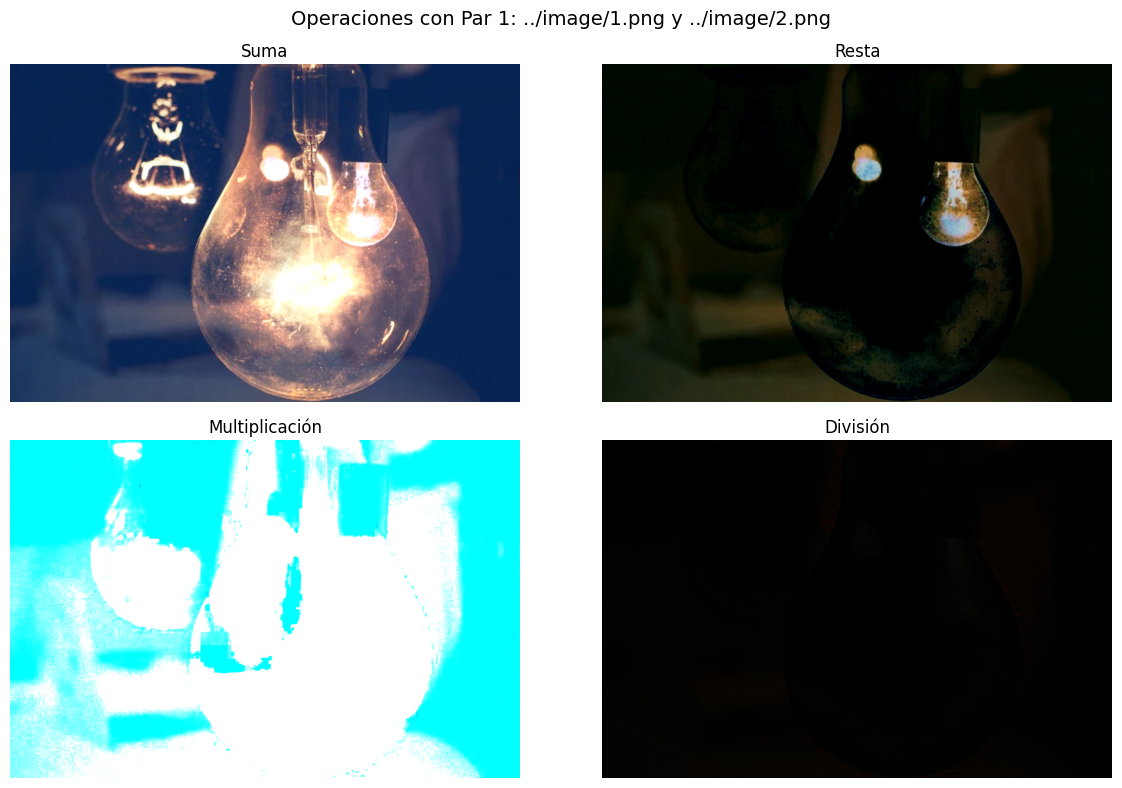

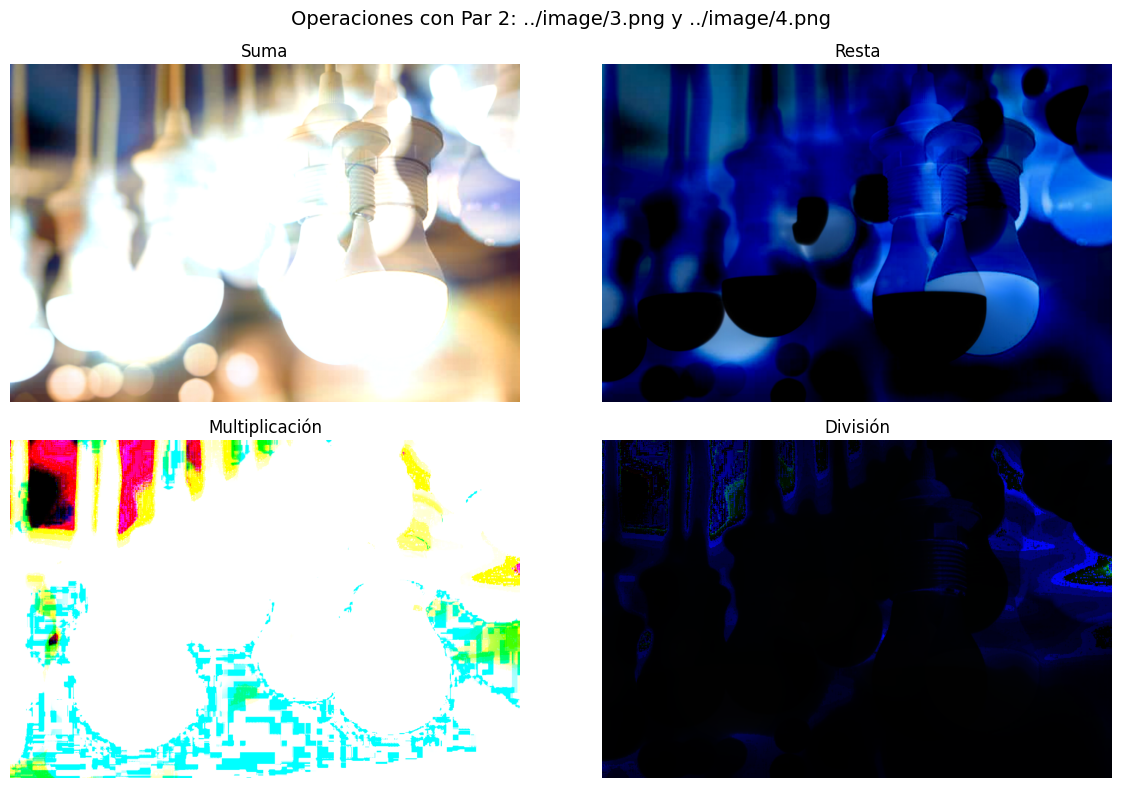

In [26]:
import cv2
import matplotlib.pyplot as plt

# Lista de imágenes
imagenes = ['../image/1.png', '../image/2.png', '../image/3.png', '../image/4.png']

# Procesar en pares (1-2 y 3-4)
pares = [(imagenes[0], imagenes[1]), (imagenes[2], imagenes[3])]

for idx, (imgA_path, imgB_path) in enumerate(pares, start=1):
    # Cargar imágenes
    img1 = cv2.imread(imgA_path, cv2.IMREAD_COLOR)
    img2 = cv2.imread(imgB_path, cv2.IMREAD_COLOR)

   

    # Redimensionar img2 al tamaño de img1
    img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

    # Operaciones
    sum_img  = cv2.add(img1, img2)
    diff_img = cv2.subtract(img1, img2)
    mult_img = cv2.multiply(img1, img2)
    div_img  = cv2.divide(img1, img2)

    # Mostrar resultados
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    fig.suptitle(f"Operaciones con Par {idx}: {imgA_path} y {imgB_path}", fontsize=14)

    axes[0][0].imshow(cv2.cvtColor(sum_img, cv2.COLOR_BGR2RGB))
    axes[0][0].set_title("Suma")
    axes[0][0].axis('off')

    axes[0][1].imshow(cv2.cvtColor(diff_img, cv2.COLOR_BGR2RGB))
    axes[0][1].set_title("Resta")
    axes[0][1].axis('off')

    axes[1][0].imshow(cv2.cvtColor(mult_img, cv2.COLOR_BGR2RGB))
    axes[1][0].set_title("Multiplicación")
    axes[1][0].axis('off')

    axes[1][1].imshow(cv2.cvtColor(div_img, cv2.COLOR_BGR2RGB))
    axes[1][1].set_title("División")
    axes[1][1].axis('off')

    plt.tight_layout()
    plt.show()
    
    # Carpeta donde se guardarán los resultados
    output_dir = "../image/resultados/operaciones/aritmeticas/"

    # Guardar imágenes resultantes
    cv2.imwrite(output_dir + f"imagenes-suma-par{idx}.png", sum_img)
    cv2.imwrite(output_dir + f"imagenes-resta-par{idx}.png", diff_img)
    cv2.imwrite(output_dir + f"imagenes-multiplicacion-par{idx}.png", mult_img)
    cv2.imwrite(output_dir + f"imagenes-division-par{idx}.png", div_img)



# 6. Operaciones Lógicas: AND, OR, NOT

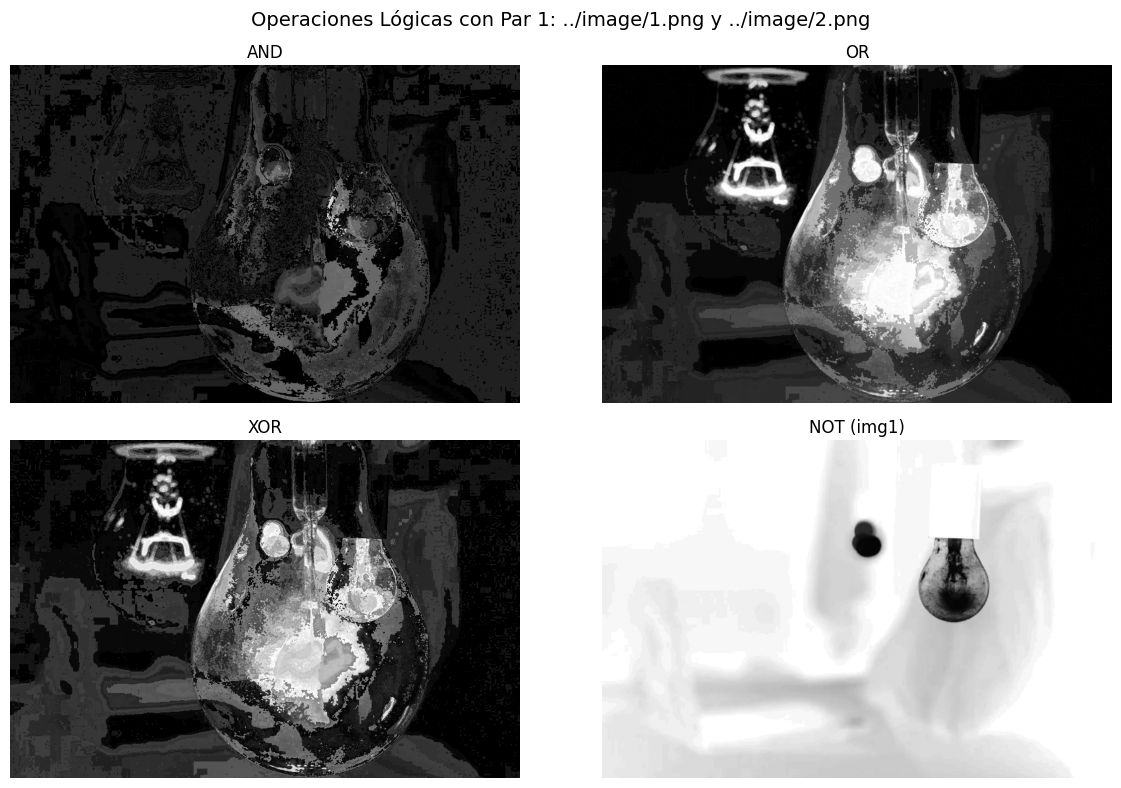

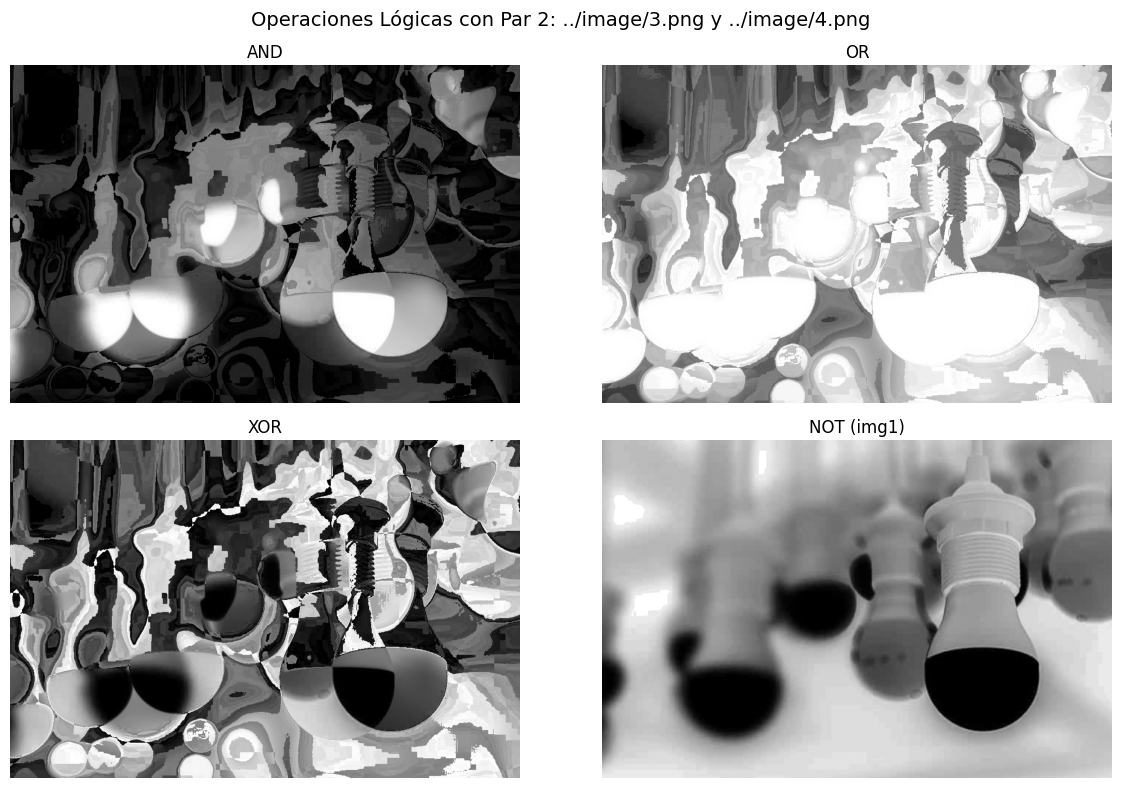

In [27]:
import cv2
import matplotlib.pyplot as plt

# Lista de imágenes
imagenes = ['../image/1.png', '../image/2.png', '../image/3.png', '../image/4.png']

# Procesar en pares (1-2 y 3-4)
pares = [(imagenes[0], imagenes[1]), (imagenes[2], imagenes[3])]

for idx, (imgA_path, imgB_path) in enumerate(pares, start=1):
    # Cargar imágenes en escala de grises (más claro para operaciones lógicas)
    img1 = cv2.imread(imgA_path, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(imgB_path, cv2.IMREAD_GRAYSCALE)

    if img1 is None or img2 is None:
        print(f"⚠️ No se pudo cargar alguna imagen del par {idx}")
        continue

    # Redimensionar img2 al tamaño de img1
    img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

    # Operaciones lógicas
    and_img = cv2.bitwise_and(img1, img2)
    or_img  = cv2.bitwise_or(img1, img2)
    xor_img = cv2.bitwise_xor(img1, img2)
    not_img = cv2.bitwise_not(img1)   # Ejemplo: negación solo de la primera

    # Mostrar resultados
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    fig.suptitle(f"Operaciones Lógicas con Par {idx}: {imgA_path} y {imgB_path}", fontsize=14)

    axes[0][0].imshow(and_img, cmap='gray')
    axes[0][0].set_title("AND")
    axes[0][0].axis('off')

    axes[0][1].imshow(or_img, cmap='gray')
    axes[0][1].set_title("OR")
    axes[0][1].axis('off')

    axes[1][0].imshow(xor_img, cmap='gray')
    axes[1][0].set_title("XOR")
    axes[1][0].axis('off')

    axes[1][1].imshow(not_img, cmap='gray')
    axes[1][1].set_title("NOT (img1)")
    axes[1][1].axis('off')

    plt.tight_layout()
    plt.show()

    # Guardar resultados
    output_dir = "../image/resultados/operaciones/logicas/"
    cv2.imwrite(output_dir + f"imagenes-and-par{idx}.png", and_img)
    cv2.imwrite(output_dir + f"imagenes-or-par{idx}.png", or_img)
    cv2.imwrite(output_dir + f"imagenes-xor-par{idx}.png", xor_img)
    cv2.imwrite(output_dir + f"imagenes-not-par{idx}.png", not_img)
